## Section 1: Overview Metrics
 * How many unique addresses are in the dataset
 * What percentage are flagged as scams
 * How many total transactions are represented

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
df = pd.read_csv('../Data/Features/feature_ethereum_data_with_ratios.csv')

In [22]:
print("total_ether_sent stats:")
print(df['total_ether_sent'].describe())

print("\ntotal_ether_received stats:")
print(df['total_ether_received'].describe())


total_ether_sent stats:
count    9.841000e+03
mean     1.016092e+04
std      3.583227e+05
min      0.000000e+00
25%      2.262059e-01
50%      1.248680e+01
75%      1.009990e+02
max      2.858096e+07
Name: total_ether_sent, dtype: float64

total_ether_received stats:
count    9.841000e+03
mean     1.163832e+04
std      3.642048e+05
min      0.000000e+00
25%      2.670424e+00
50%      3.052963e+01
75%      1.010000e+02
max      2.858159e+07
Name: total_ether_received, dtype: float64


### Notes on Ether Amounts

- The values in **`total_ether_sent`** and **`total_ether_received`** columns are already in **ETH**.
- No conversion from wei was necessary.
- This conclusion is based on the observed value ranges and statistics.

In [ ]:
num_addresses = df['address'].nunique()
print(f"Number of unique addresses: {num_addresses}")

Number of unique addresses: 9816


In [7]:
num_scams = df['flag'].sum()
print(f"Number of scams: {num_scams}")
num_non_scams = num_addresses - num_scams
print(f"Number of non-scams: {num_non_scams}")
scam_percentage = num_scams / num_addresses * 100
print(f"Percentage of scams: {scam_percentage:.2f}%")

Number of scams: 2179
Number of non-scams: 7637
Percentage of scams: 22.20%


## Section 2: User Segmentation
 * What % of wallets are sender-only, receiver-only, or both
 * How does this differ between scam and non-scam addresses


In [9]:
senders = set(df[df['sent_tnx'] > 0]['address'])
receivers = set(df[df['received_tnx'] > 0]['address'])

sender_only = senders - receivers
receiver_only = receivers - senders
both = senders & receivers

segmentation = {
    'Sender Only': len(sender_only),
    'Receiver Only': len(receiver_only),
    'Both': len(both)
}

## Section 3: Distribution of Average Transaction Sizes
 * What is the distribution of average transaction size per address
 * How does it differ for scam vs. non-scam addresses

Due to extreme outliers, `log_scale=True` will be used to handle skewed data. 

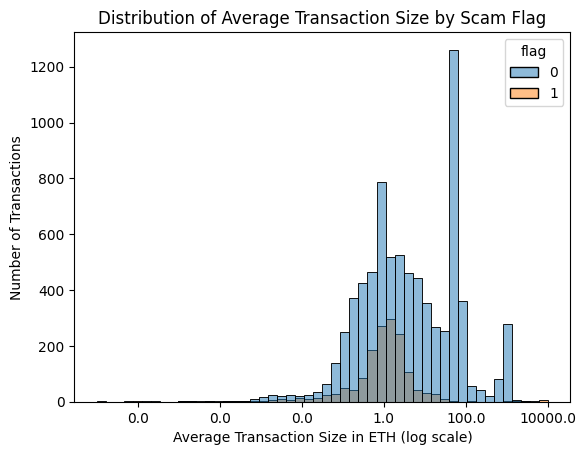

In [24]:
df['total_value'] = df['total_ether_sent'] + df['total_ether_received']
df['tx_count'] = df['sent_tnx'] + df['received_tnx']
df['avg_tx_size'] = df['total_value'] / (df['tx_count'] + 1e-5)

# Plot
fig, ax = plt.subplots()
sns.histplot(
    data=df[df['avg_tx_size'].notna() & df['flag'].notna()],
    x='avg_tx_size',
    hue='flag',
    bins=50,
    log_scale=True,
    ax=ax
)

# Format x-axis labels
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:.1f}'))
ax.set_ylabel('Number of Transactions') 
plt.title('Distribution of Average Transaction Size by Scam Flag')
plt.xlabel('Average Transaction Size in ETH (log scale)')
plt.show()

The result shows here that most of the avg_tx_size values lie between 0.01 and 100 ETH. There are a few wallets with huge average transaction sizes, and some with extremely small ones.

## Section 4: Transaction Frequency per Address
* Are scams more or less active
* What’s the distribution of transaction counts per address

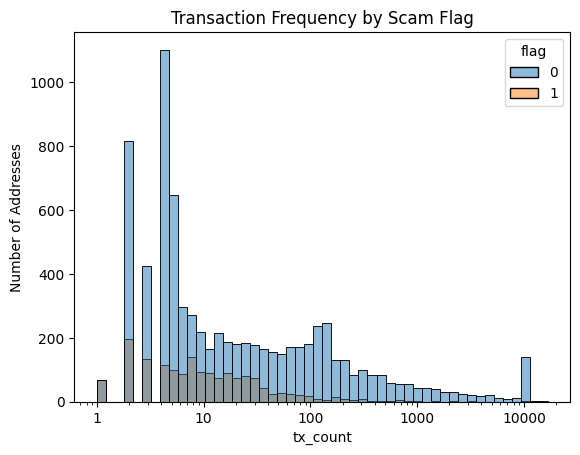

In [27]:
sns.histplot(data=df, x='tx_count', hue='flag', bins=50, log_scale=True)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:.0f}'))

plt.title('Transaction Frequency by Scam Flag')
plt.ylabel('Number of Addresses')
plt.show()